## HIP54287
### (a quiet solar twin)

In [1]:
import wobble
import matplotlib.pyplot as plt
import numpy as np
import copy

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Load up the results:

In [2]:
starid = 'hip54287'
a = wobble.Results() 
a2 = copy.deepcopy(a)
a.load_results('../results/'+starid+'_wobbleflow.hdf5')
a2.load_results('../results/'+starid+'_wobbleflow_telluricsfixed.hdf5')
data = wobble.Data(starid+'_e2ds.hdf5', filepath='../data/', 
                   orders=[40]) # just for pipeline results & BERVs

Text(0.5,0,'MJD')

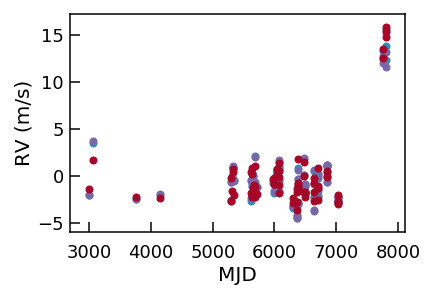

In [3]:
wobble_rvs = (a.time_rvs - data.bervs) - np.mean(a.time_rvs - data.bervs)
tfixed_rvs = (a2.time_rvs - data.bervs) - np.mean(a2.time_rvs - data.bervs)
pipeline_rvs = -1 * (data.pipeline_rvs - data.bervs) + np.mean(data.pipeline_rvs - data.bervs)
dates = data.dates - 2450000
plt.scatter(dates, wobble_rvs)
plt.scatter(dates, tfixed_rvs)
plt.scatter(dates, pipeline_rvs)
plt.ylabel('RV (m/s)', fontsize=20)
plt.xlabel('MJD', fontsize=20)

Cut off the last few (post-upgrade) epochs:

In [4]:
wobble_rvs = wobble_rvs[:-5]
tfixed_rvs = tfixed_rvs[:-5]
pipeline_rvs = pipeline_rvs[:-5]
dates = dates[:-5]

Text(0.5,0,'MJD')

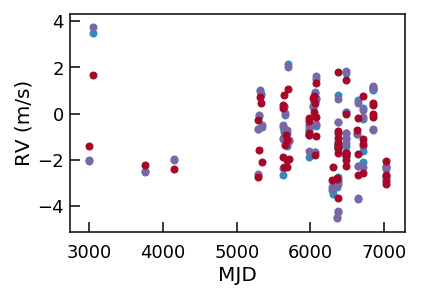

In [5]:
plt.scatter(dates, wobble_rvs)
plt.scatter(dates, tfixed_rvs)
plt.scatter(dates, pipeline_rvs)
plt.ylabel('RV (m/s)', fontsize=20)
plt.xlabel('MJD', fontsize=20)

In [6]:
print("Scatter of wobble RVs (tellurics free): {0:.3f}".format(np.std(wobble_rvs)))
print("Scatter of wobble RVs (tellurics fixed): {0:.3f}".format(np.std(tfixed_rvs)))
print("Scatter of HARPS pipeline RVs: {0:.3f}".format(np.std(pipeline_rvs)))

Scatter of wobble RVs (tellurics free): 1.553
Scatter of wobble RVs (tellurics fixed): 1.560
Scatter of HARPS pipeline RVs: 1.318


Nicer plot for DFM:

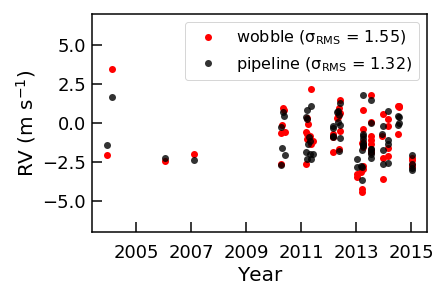

In [65]:
from astropy.time import Time
times = Time(dates+2450000, format='jd')
plt.plot_date(times.plot_date, wobble_rvs, color='r', 
              label='wobble ($\sigma_{{RMS}}$ = {:.2f})'.format(np.std(wobble_rvs)))
plt.plot_date(times.plot_date, pipeline_rvs, alpha=0.8, color='k', 
              label='pipeline ($\sigma_{{RMS}}$ = {:.2f})'.format(np.std(pipeline_rvs)))
#plt.gcf().autofmt_xdate()
plt.ylim([-7,7])
plt.ylabel(r'RV (m s$^{-1}$)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(fontsize=16)
plt.savefig('wobble_quietstar_rms.pdf')

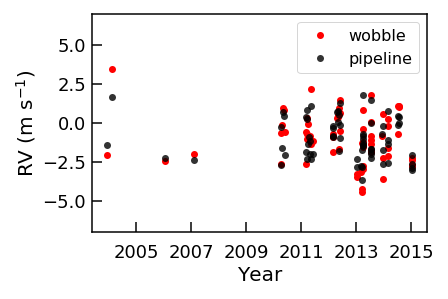

In [66]:
plt.plot_date(times.plot_date, wobble_rvs, color='r', 
              label='wobble')
plt.plot_date(times.plot_date, pipeline_rvs, alpha=0.8, color='k', 
              label='pipeline')
#plt.gcf().autofmt_xdate()
plt.ylim([-7,7])
plt.ylabel(r'RV (m s$^{-1}$)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(fontsize=16)
plt.savefig('wobble_quietstar.pdf')